<a href="https://colab.research.google.com/github/DhruvAgg10/Python-projects/blob/main/housingprice2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

0:	learn: 0.3434978	total: 48.6ms	remaining: 24.2s
200:	learn: 0.1262091	total: 336ms	remaining: 499ms
400:	learn: 0.0982759	total: 629ms	remaining: 155ms
499:	learn: 0.0888139	total: 767ms	remaining: 0us

🔹 Linear Regression Performance:
   - RMSE: 1314648.1954
   - R²: 0.6581

🔹 Polynomial Regression Performance:
   - RMSE: 1485537.8128
   - R²: 0.5634

🔹 XGBoost Performance:
   - RMSE: 1497561.0753
   - R²: 0.5563

🔹 CatBoost Performance:
   - RMSE: 1423835.9612
   - R²: 0.5989


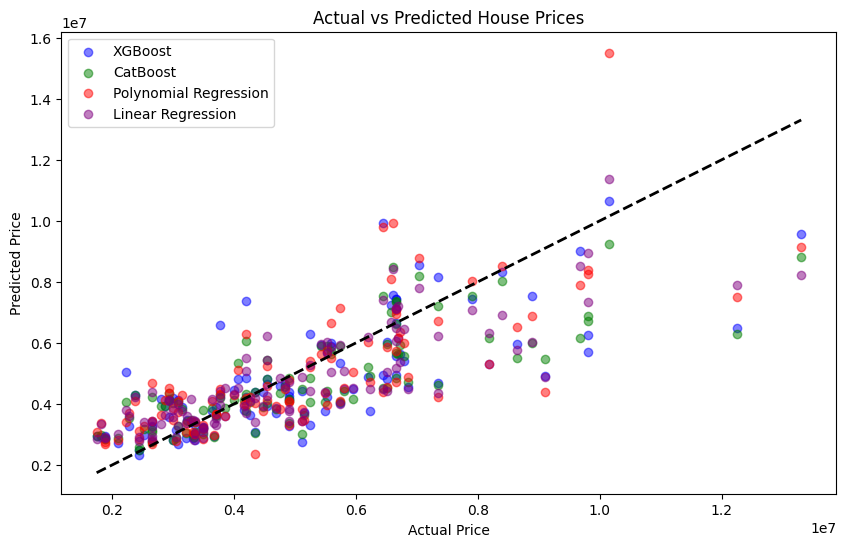

In [148]:
# Importing Libraries
!pip install catboost
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

# Load Dataset
dataset = pd.read_csv('/content/Housing.csv')

# Separate labels and target
X = dataset.drop('price', axis=1)
y = dataset['price']

# Apply log transformation to the target variable (price)
y_log = np.log1p(y)  # log1p avoids log(0) errors

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(exclude=['object']).columns

# One-Hot Encoding for categorical features (Alternative to LabelEncoding)
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.2, random_state=42)

# Standardizing numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 🔹 Model 1: **Linear Regression**
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)

# 🔹 Model 2: **Polynomial Regression (Degree=2)**
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_pred_poly = poly_model.predict(X_test_poly)

# 🔹 Model 3: **XGBoost Regressor**
xgb_model = XGBRegressor(n_estimators=500, learning_rate=0.05, max_depth=7, random_state=42)
xgb_model.fit(X_train_scaled, y_train)
y_pred_xgb = xgb_model.predict(X_test_scaled)

# 🔹 Model 4: **CatBoost Regressor**
cat_model = CatBoostRegressor(iterations=500, learning_rate=0.05, depth=7, random_state=42, verbose=200)
cat_model.fit(X_train, y_train)  # CatBoost handles categorical data automatically
y_pred_cat = cat_model.predict(X_test)

# Convert predictions back to original scale
y_test_orig = np.expm1(y_test)  # Reverse log transformation
y_pred_lr_orig = np.expm1(y_pred_lr)
y_pred_poly_orig = np.expm1(y_pred_poly)
y_pred_xgb_orig = np.expm1(y_pred_xgb)
y_pred_cat_orig = np.expm1(y_pred_cat)

# Evaluate models
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"\n🔹 {model_name} Performance:")
    print(f"   - RMSE: {rmse:.4f}")
    print(f"   - R²: {r2:.4f}")

evaluate_model(y_test_orig, y_pred_lr_orig, "Linear Regression")
evaluate_model(y_test_orig, y_pred_poly_orig, "Polynomial Regression")
evaluate_model(y_test_orig, y_pred_xgb_orig, "XGBoost")
evaluate_model(y_test_orig, y_pred_cat_orig, "CatBoost")

# Visualization: Actual vs Predicted Prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test_orig, y_pred_xgb_orig, color='blue', label='XGBoost', alpha=0.5)
plt.scatter(y_test_orig, y_pred_cat_orig, color='green', label='CatBoost', alpha=0.5)
plt.scatter(y_test_orig, y_pred_poly_orig, color='red', label='Polynomial Regression', alpha=0.5)
plt.scatter(y_test_orig, y_pred_lr_orig, color='purple', label='Linear Regression', alpha=0.5)
plt.plot([y_test_orig.min(), y_test_orig.max()], [y_test_orig.min(), y_test_orig.max()], 'k--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted House Prices')
plt.legend()
plt.show()
